# DAT565 Introduction to Data Science and AI
## 2023-2024, LP1
## Assignment 4: Spam classification using Naïve Bayes
This assignment has three obligatory questions. Questions 4-5 are optional and will not be graded.

The exercise takes place in this notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical.

*Tips:*
* You can execute certain Linux shell commands by prefixing the command with a `!`.
* You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results, the second you can use to write code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets.

You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location:
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages.
-	hard-ham: non-spam messages more difficult to differentiate
-	spam: spam messages

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.**

If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer. Note that if you are using Windows, you can instead use (7zip)[https://www.7-zip.org/download.html] to decompress the data (you will have to modify the cell below).

**What to submit:**
* Convert the notebook to a PDF file by compiling it, and submit the PDF file.
* Make sure all cells are executed so all your code and its results are included.
* Double-check that the PDF displays correctly before you submit it.

In [ ]:
# download and extract the data
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
!tar -xjf 20021010_easy_ham.tar.bz2
!tar -xjf 20021010_hard_ham.tar.bz2
!tar -xjf 20021010_spam.tar.bz2

--2023-09-23 14:31:54--  https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1677144 (1.6M) [application/x-bzip2]
Saving to: ‘20021010_easy_ham.tar.bz2.1’

20021010_easy_ham.t 100%[===================>]   1.60M  --.-KB/s    in 0.08s   

2023-09-23 14:31:54 (20.8 MB/s) - ‘20021010_easy_ham.tar.bz2.1’ saved [1677144/1677144]

--2023-09-23 14:31:54--  https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1021126 (997K) [application/x-bzip2]
Saving to: ‘20021010_har

The data is now in the following three folders: `easy_ham`, `hard_ham`, and `spam`. You can confirm this via the following command:

In [ ]:
!ls -lah

#!pip install scikit-learn

total 7.7M
drwxr-xr-x 1 root root 4.0K Sep 23 14:31 .
drwxr-xr-x 1 root root 4.0K Sep 23 13:51 ..
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2.1
-rw-r--r-- 1 root root 998K Dec 16  2004 20021010_hard_ham.tar.bz2
-rw-r--r-- 1 root root 998K Dec 16  2004 20021010_hard_ham.tar.bz2.1
-rw-r--r-- 1 root root 1.2M Jun 29  2004 20021010_spam.tar.bz2
-rw-r--r-- 1 root root 1.2M Jun 29  2004 20021010_spam.tar.bz2.1
drwxr-xr-x 4 root root 4.0K Sep 21 13:48 .config
drwx--x--x 2  500  500 176K Oct 10  2002 easy_ham
drwx--x--x 2 1000 1000  20K Dec 16  2004 hard_ham
drwxr-xr-x 1 root root 4.0K Sep 21 13:49 sample_data
drwxr-xr-x 2  500  500  36K Oct 10  2002 spam


### 1. Preprocessing:
Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text (in the optional part further down, you can experiment with filtering out the headers and footers).
1.	We don’t want to train and test on the same data (it might help to reflect on **why** ,if you don't recall). Split the spam and ham datasets into a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`). Use `easy_ham` for quesions 1 and 2.


In [ ]:
# write your pre-processing code here
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

ham_directory = '/content/easy_ham'
spam_directory = '/content/spam'
hardham_directory = '/content/hard_ham'


def read_emails(directory):
    email_data = []
    files = os.listdir(directory)
    for file in files:
        with open(os.path.join(directory, file), 'r', encoding='utf-8', errors='ignore') as f:
            content = f.read()
            email_data.append(content)
    return email_data

ham_data = read_emails(ham_directory)
spam_data = read_emails(spam_directory)
hardham_data = read_emails(hardham_directory)

hamtrain, hamtest = train_test_split(ham_data, test_size=0.2, random_state=42)
spamtrain, spamtest = train_test_split(spam_data, test_size=0.2, random_state=42)
hardhamtrain, hardhamtest = train_test_split(hardham_data, test_size=0.2, random_state=42)

### 2. Write a Python program that:
1.	Uses the four datasets from Question 1 (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`).
2.	Trains a Naïve Bayes classifier (use the [scikit-learn library](https://scikit-learn.org/stable/)) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. You can use `CountVectorizer` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)) to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifiers available in *scikit-learn* ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Here, you will test two of these classifiers that are well suited for this problem:
- Multinomial Naive Bayes
- Bernoulli Naive Bayes.

Please inspect the documentation to ensure input to the classifiers is appropriate before you start coding. You may have to modify your input.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from scipy.sparse import vstack


vectorizer = CountVectorizer()

X_hamtrain = vectorizer.fit_transform(hamtrain)
X_spamtrain = vectorizer.transform(spamtrain)

mnb_classifier = MultinomialNB()

X_combined_train = vstack((X_hamtrain, X_spamtrain))

Y_combined_train = ['ham']*len(hamtrain) + ['spam']*len(spamtrain)

mnb_classifier.fit(X_combined_train, Y_combined_train)

X_hamtest = vectorizer.transform(hamtest)
X_spamtest = vectorizer.transform(spamtest)

mnb_ham_predictions = mnb_classifier.predict(X_hamtest)
mnb_spam_predictions = mnb_classifier.predict(X_spamtest)

mnb_ham_cm = confusion_matrix(['ham']*len(hamtest), mnb_ham_predictions, labels=['ham', 'spam']).ravel()
mnb_spam_cm = confusion_matrix(['spam']*len(spamtest), mnb_spam_predictions, labels=['ham', 'spam']).ravel()


mnb_ham_true_positive = mnb_ham_cm[0]
mnb_ham_false_negative = mnb_ham_cm[1]
mnb_spam_true_positive = mnb_spam_cm[3]
mnb_spam_false_negative = mnb_spam_cm[2]

print("Multinomial Naive Bayes - Ham")
print(f"True Positives: {mnb_ham_true_positive}")
print(f"False Negatives: {mnb_ham_false_negative}")

print("\nMultinomial Naive Bayes - Spam")
print(f"True Positives: {mnb_spam_true_positive}")
print(f"False Negatives: {mnb_spam_false_negative}")



Multinomial Naive Bayes - Ham
True Positives: 511
False Negatives: 0

Multinomial Naive Bayes - Spam
True Positives: 93
False Negatives: 8


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb_classifier = BernoulliNB()

bnb_classifier.fit(X_combined_train, Y_combined_train)

bnb_ham_predictions = bnb_classifier.predict(X_hamtest)
bnb_spam_predictions = bnb_classifier.predict(X_spamtest)



bnb_ham_cm = confusion_matrix(['ham']*len(hamtest), bnb_ham_predictions, labels=['ham', 'spam']).ravel()
bnb_spam_cm = confusion_matrix(['spam']*len(spamtest), bnb_spam_predictions, labels=['ham', 'spam']).ravel()


bnb_ham_true_positive = bnb_ham_cm[0]
bnb_ham_false_negative = bnb_ham_cm[1]
bnb_spam_true_positive = bnb_spam_cm[3]
bnb_spam_false_negative = bnb_spam_cm[2]


print("Bernoulli Naive Bayes - Ham")
print(f"True Positives: {bnb_ham_true_positive}")
print(f"False Negatives: {bnb_ham_false_negative}")

print("\nBernoulli Naive Bayes - Spam")
print(f"True Positives: {bnb_spam_true_positive}")
print(f"False Negatives: {bnb_spam_false_negative}")


array([ 0,  0, 11, 90])

Bernoulli Naive Bayes - Ham
True Positives: 508
False Negatives: 3

Bernoulli Naive Bayes - Spam
True Positives: 90
False Negatives: 11


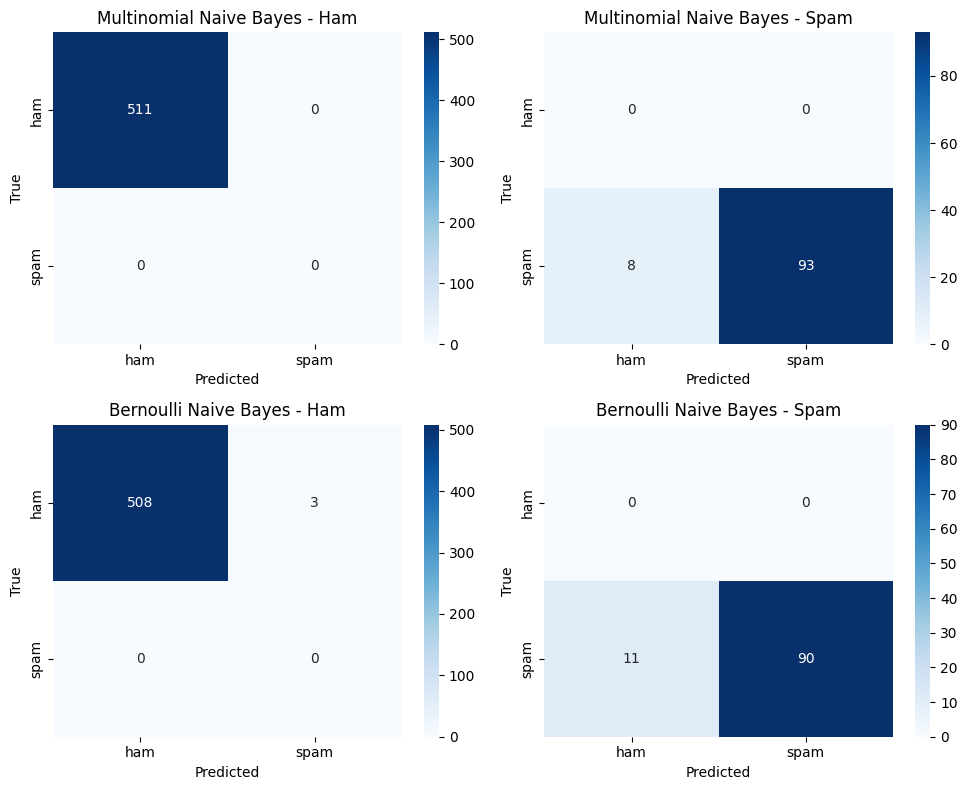

In [ ]:
# Assuming you have defined bnb_ham_cm and bnb_spam_cm earlier in your code

import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(ax, cm, labels, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot confusion matrices
plot_confusion_matrix(axes[0, 0], mnb_ham_cm.reshape((2, 2)), ['ham', 'spam'], title='Multinomial Naive Bayes - Ham')
plot_confusion_matrix(axes[0, 1], mnb_spam_cm.reshape((2, 2)), ['ham', 'spam'], title='Multinomial Naive Bayes - Spam')
plot_confusion_matrix(axes[1, 0], bnb_ham_cm.reshape((2, 2)), ['ham', 'spam'], title='Bernoulli Naive Bayes - Ham')
plot_confusion_matrix(axes[1, 1], bnb_spam_cm.reshape((2, 2)), ['ham', 'spam'], title='Bernoulli Naive Bayes - Spam')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
saved_fig = fig


### 3. Run on hard ham:
Run the two models from Question 2 on `spam` versus `hard-ham`, and compare to the `easy-ham` results.

In [ ]:
X_hamtrain = vectorizer.fit_transform(hardhamtrain)
X_spamtrain = vectorizer.transform(spamtrain)

X_combined_train = vstack((X_hamtrain, X_spamtrain))

Y_combined_train = ['ham']*len(hardhamtrain) + ['spam']*len(spamtrain)

mnb_classifier.fit(X_combined_train, Y_combined_train)

X_hamtest = vectorizer.transform(hardhamtest)
X_spamtest = vectorizer.transform(spamtest)

mnb_ham_predictions = mnb_classifier.predict(X_hamtest)
mnb_spam_predictions = mnb_classifier.predict(X_spamtest)


mnb_ham_cm = confusion_matrix(['ham']*len(hardhamtest), mnb_ham_predictions, labels=['ham', 'spam']).ravel()
mnb_spam_cm = confusion_matrix(['spam']*len(spamtest), mnb_spam_predictions, labels=['ham', 'spam']).ravel()


mnb_ham_true_positive = mnb_ham_cm[0]
mnb_ham_false_negative = mnb_ham_cm[1]
mnb_spam_true_positive = mnb_spam_cm[3]
mnb_spam_false_negative = mnb_spam_cm[2]

print("Multinomial Naive Bayes - Ham")
print(f"True Positives: {mnb_ham_true_positive}")
print(f"False Negatives: {mnb_ham_false_negative}")

print("\nMultinomial Naive Bayes - Spam")
print(f"True Positives: {mnb_spam_true_positive}")
print(f"False Negatives: {mnb_spam_false_negative}")  # Corrected variable name



Multinomial Naive Bayes - Ham
True Positives: 41
False Negatives: 9

Multinomial Naive Bayes - Spam
True Positives: 97
False Negatives: 4


In [ ]:
bnb_classifier.fit(X_combined_train, Y_combined_train)

bnb_ham_predictions = bnb_classifier.predict(X_hamtest)
bnb_spam_predictions = bnb_classifier.predict(X_spamtest)

bnb_ham_cm = confusion_matrix(['ham']*len(hardhamtest), bnb_ham_predictions, labels=['ham', 'spam']).ravel()
bnb_spam_cm = confusion_matrix(['spam']*len(spamtest), bnb_spam_predictions, labels=['ham', 'spam']).ravel()

display(bnb_spam_cm)

bnb_ham_true_positive = bnb_ham_cm[0]
bnb_ham_false_negative = bnb_ham_cm[1]
bnb_spam_true_positive = bnb_spam_cm[3]
bnb_spam_false_negative = bnb_spam_cm[2]


print("Bernoulli Naive Bayes - Ham")
print(f"True Positives: {bnb_ham_true_positive}")
print(f"False Negatives: {bnb_ham_false_negative}")

print("\nBernoulli Naive Bayes - Spam")
print(f"True Positives: {bnb_spam_true_positive}")
print(f"False Negatives: {bnb_spam_false_negative}")


array([ 0,  0,  3, 98])

Bernoulli Naive Bayes - Ham
True Positives: 33
False Negatives: 17

Bernoulli Naive Bayes - Spam
True Positives: 98
False Negatives: 3


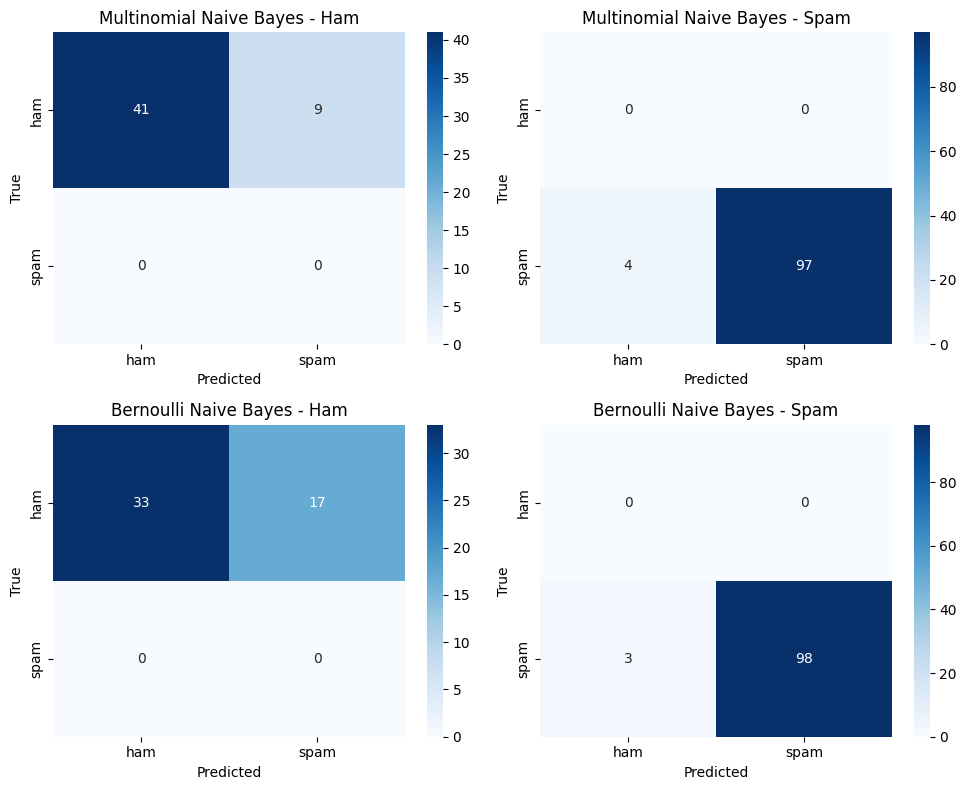

In [ ]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot confusion matrices
plot_confusion_matrix(axes[0, 0], mnb_ham_cm.reshape((2, 2)), ['ham', 'spam'], title='Multinomial Naive Bayes - Ham')
plot_confusion_matrix(axes[0, 1], mnb_spam_cm.reshape((2, 2)), ['ham', 'spam'], title='Multinomial Naive Bayes - Spam')
plot_confusion_matrix(axes[1, 0], bnb_ham_cm.reshape((2, 2)), ['ham', 'spam'], title='Bernoulli Naive Bayes - Ham')
plot_confusion_matrix(axes[1, 1], bnb_spam_cm.reshape((2, 2)), ['ham', 'spam'], title='Bernoulli Naive Bayes - Spam')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
saved_fig2 = fig


#Comment on the different between "Easy-Ham" and "Hard-Ham"

When we look at the result of the categorization, we can see that when the model tries to predict the “Hard-Ham”, both the Multinomial Naïve Bayes and the Bernoulli Naice Bayes drops significantly in performance. The largest difference in performance is seen on the Barnoulli Naïve Bayes, which only has a 66% rate of true positives, and a 17% rate of false negatives. On the “Easy-Ham” data, the same numbers were 99.41% (True Positives) and 0.59% (False Negatives). The Multinomial Naïve Bayes also struggles to correctly categorize the “Hard-Ham” data, giving us a 82% rate of  True-Positives, and 18% of false negatives. Even though this drop isn’t as large as Bernoulli, it is still considerable since it had a 100% accuracy on the “Easy-Ham” data.

**Why do we obtain a difference in performance? Is the model the culprit or the data or even both? Explain why you think we obtain decreases/increases in say accuracy for the different models and the different data sets.**

Of course, the difference in performance of hard-ham and easy-ham can be related to the data. Without further knowledge about exactly how the data differs, the "hard-ham" data probably contains less of what distinguishes non-spam from spam (i.e. is more similar to spam) and thus it is harder for the model to make correct predictions. Though, the difference in the performance between the models can be explained by how the models work.

MNB takes into account the frequencies of the words in the emails while BNB only takes into account wether the word is present in the email or not. From this MNB seems to be a more appropriate method to use for the given data set since frequencies of words is an important factor in when examining text. This is probably why MNB performes better than BNB.

In conclusion, the differences in performance can be accounted to both the models and the data set.




**Discuss the differences between the models. Is there a model that is better suited for our task, given the results?**

We touched on this in the previous question, but as mentioned MNB relies on frequencies of words while BNB only account for existence of words. For this dataset, emails, MNB seems to be the better model which can be seen in the result.


**Are the obtained results reasonable and why? E.g. Is it reasonable that Multinomial Naïve Bayes struggles to correctly categorize the hard-ham data.**

Even though MNB accounts for frequencies of words, it might not be enough to classify every email correctly. The harder ham dataset might be more complex and since MNB treats features as independent, while they are dependant in the hard-ham data set, MNB has a harder time correctly classifying it.

The hard-ham dataset is much smaller that the easy-ham, this might also be a reason for the worse performace since the model has had fewer datapoints to train on.


### 4.	OPTIONAL - NOT MARKED:
To avoid classification based on common and uninformative words, it is common practice to filter these out.

**a.** Think about why this may be useful. Show a few examples of too common and too uncommon words.

**b.** Use the parameters in *scikit-learn*’s `CountVectorizer` to filter out these words. Update the program from Question 2 and run it on `easy-ham` vs `spam` and `hard-ham` vs `spam`. Report your results.

In [ ]:
# write your code here

### 5. OPTIONAL - NOT MARKED: Further improving performance
Filter out the headers and footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions:
- Does the result improve from those obtained in Questions 3 and 4?
- What do you expect would happen if your training set consisted mostly of spam messages, while your test set consisted mostly of ham messages, or vice versa?
- Look at the `fit_prior` parameter. What does this parameter mean? Discuss in what settings it can be helpful (you can also test your hypothesis).

In [ ]:
# write your code here